In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Método de Euler
---------------


In [16]:
def euler (f,h,y0,t0,tf):
    i = 0
    y_array = [y0]
    t_array = [t0]
    t = t0
    y = y0
    while (t <= tf):
        y = y + h*f(t,y)
        t = t+h
        y_array.append(y)
        t_array.append(t)
    return [y_array,t_array]    
    
    

In [147]:
def g (t,y):
    return t*np.cos(y+t**3)+np.log(y*t+2)

In [148]:
a = euler(g,0.001,0,0,3)

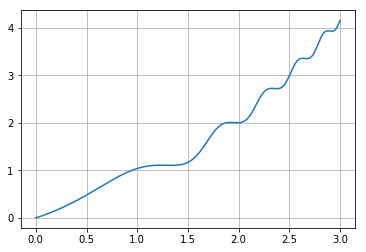

In [149]:
plt.plot(a[1],a[0])
plt.grid(True)

Método de Runge-Kutta de orden 4
--------------------------------


In [37]:
def rk4 (f,h,y0,t0,tf):
    y_array = [y0]
    t_array = [t0]
    y = y0
    t = t0
    while t <= tf :
        k1 = f(t,y)
        k2 = f(t+(h/2),y+((h/2)*k1))
        k3 = f(t+(h/2),y+((h/2)*k2))
        k4 = f(t+h,y+(h*k3))
        y = y+((h/6)*(k1+(2*k2)+(2*k3)+k4))
        t += h
        y_array.append(y)
        t_array.append(t)
    return [y_array,t_array]

In [150]:
b = rk4(g,0.01,0,0,3)

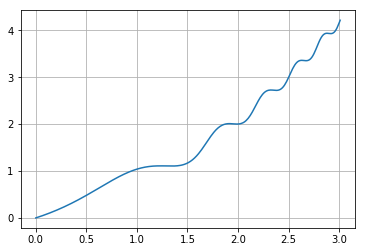

In [151]:
plt.plot(b[1],b[0])
plt.grid(True)

Punto 1
-------



### Datos

In [131]:
def f (t,T):
    print(T)
    return ((((-hc)*s) / (m*C)) * (T-T_inf(t,T1,T2))) + ((o*e*s)*((T**4) - (T_inf(t,T1,T2)**4)))

def T_inf (t,T1,T2):
    x = v0*t
    if x<=(L/2):
        return T1
    else:
        return T2

In [135]:
p = 7850
C = 480
OD = 0.24448  
WT = 0.01384
Lt = 12
L = 50
nbol = 50
cad = 24
T1 = 986
T2 = T1
hc = 20
o = 0.000000056703
e = 0.85

v0 = L/(nbol*cad)
tf = L/v0

In [68]:
e = 0 #anulo término de radiación
m = p*np.pi*OD*WT*(1-(WT/OD))*Lt
s = np.pi*OD*Lt

In [69]:
rk4_1 = rk4(f,cad,293.15,0,tf)

In [71]:
euler_1 = euler(f,cad,293.15,0,tf)

In [86]:
def solution_1(t):
    return T_inf(t,T1,T2)+((293.15-T_inf(t,T1,T2))*(np.e**((((-(hc*s))/(m*C)))*t)))
real_sol_1 = [[],[]]
real_sol_1[1] = euler_1[1]
for i in real_sol_1[1]:
    real_sol_1[0].append(solution_1(i))

1a
---

Text(0.5, 0, 'Segundos')

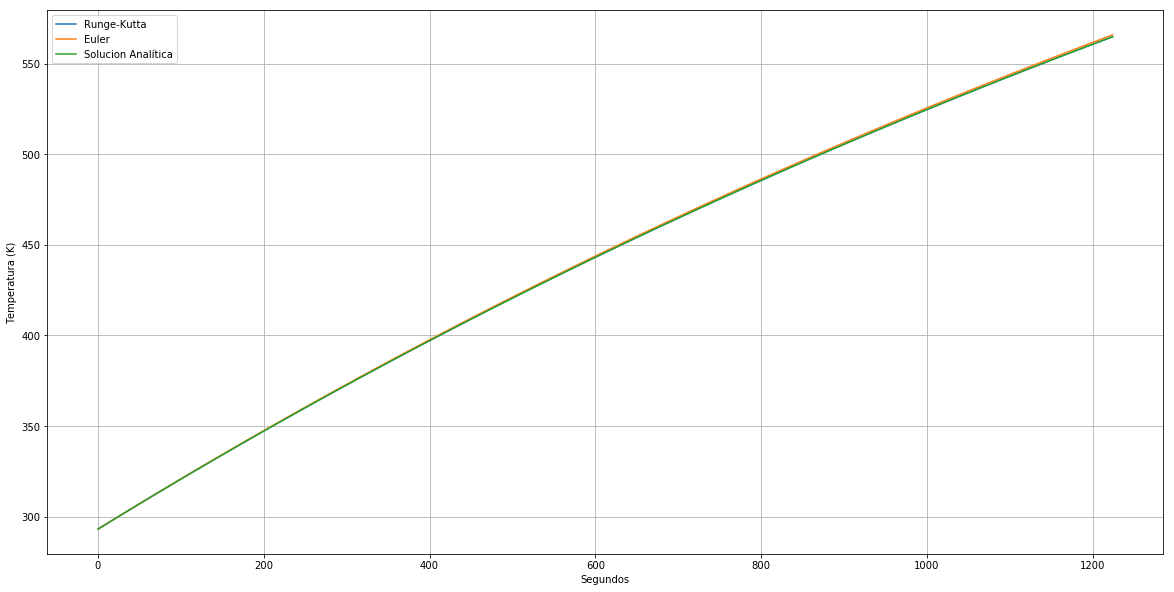

In [95]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=rk4_1[1],y=rk4_1[0],label='Runge-Kutta')
sns.lineplot(x=euler_1[1],y=euler_1[0],label='Euler')
sns.lineplot(x=real_sol_1[1],y=real_sol_1[0],label='Solucion Analítica')
plt.grid(True)
plt.ylabel('Temperatura (K)')
plt.xlabel('Segundos')

1b
---

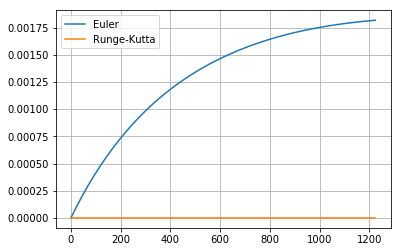

In [99]:
diff_rk4_1 = np.array(rk4_1[0])-np.array(real_sol_1[0])
diff_euler_1 = (np.array(euler_1[0])-np.array(real_sol_1[0]))/np.array(euler_1[0])
sns.lineplot(x=euler_1[1],y=diff_euler_1,label='Euler')
sns.lineplot(x=euler_1[1],y=diff_rk4_1,label='Runge-Kutta')
plt.grid(True)

1c
---



Punto 2
-------



### Datos

In [117]:
p = 7850
C = 480
OD = 0.24448  
WT = 0.01384
Lt = 12
L = 50
nbol = 50
cad = 24
T1 = 986
T2 = T1
hc = 20
o = 5.6703*(10**(-8))
e = 0.85

v0 = L/(nbol*cad)
tf = L/v0

In [118]:
m = p*np.pi*OD*WT*(1-(WT/OD))*Lt
s = np.pi*OD*Lt

In [142]:
def f (t,T):
    return ((((-hc)*s) / (m*C)) * (T-T_inf(t,T1,T2))) - (((o*e*s)*((T**4) - (T_inf(t,T1,T2)**4)))/(m*C))

def T_inf (t,T1,T2):
    x = v0*t
    if x<=(L/2):
        return T1
    else:
        return T2

2a
---
Elegimos el método de Runge-Kutta porque es el método que funcionó mejor para el ítem 1 (dió cero error)

In [143]:
rk4_2 = rk4(f,cad,293.15,0,tf)

In [144]:
def solution_2(t):
    return T_inf(t,T1,T2)+((293.15-T_inf(t,T1,T2))*(np.e**((((-(hc*s))/(m*C)))*t)))
real_sol_2 = [[],[]]
real_sol_2[1] = rk4_2[1]
for i in real_sol_2[1]:
    real_sol_2[0].append(solution_2(i))

2b
----

Text(0.5, 0, 'Segundos')

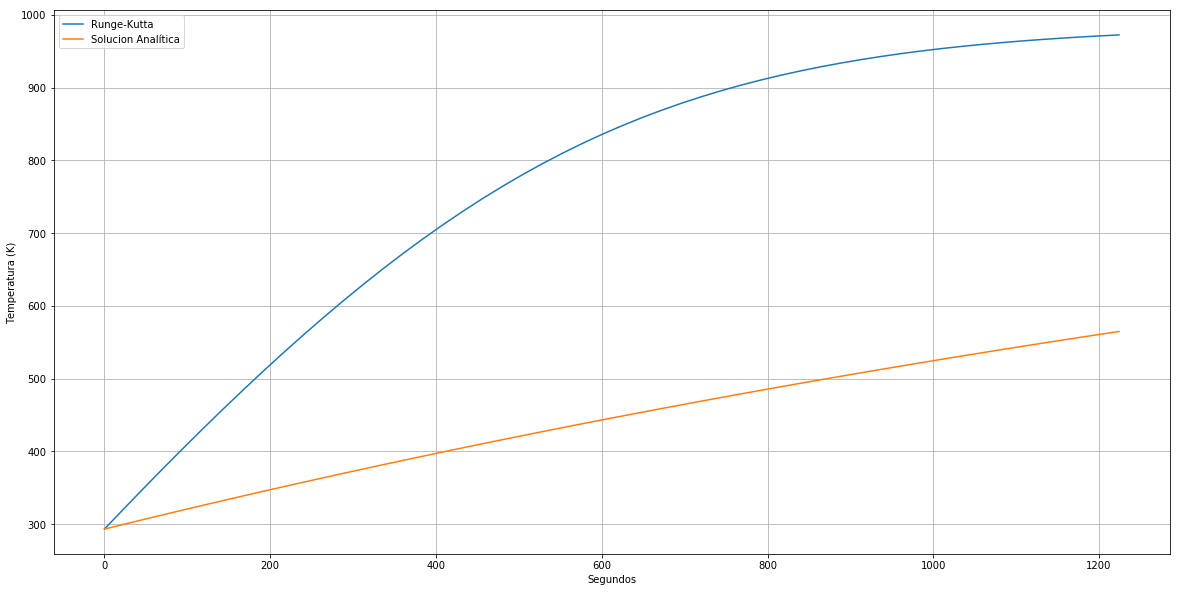

In [145]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=rk4_2[1],y=rk4_2[0],label='Runge-Kutta')
sns.lineplot(x=real_sol_2[1],y=real_sol_2[0],label='Solucion Analítica')
plt.grid(True)
plt.ylabel('Temperatura (K)')
plt.xlabel('Segundos')

Vemos que el intercambio de radiación **NO** es despreciable

2c
--